In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [96]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    # TODO: perform non-maximum suppression

    for i in range(h-3):
        for j in range(w-3):
            h_local = harris_resp[np.ix_(np.arange(i, i+3), np.arange(j, j+3))]
            if ((h_local[1,1] >= thr) and (h_local[1,1] == np.amax(h_local))):
                cornersy.append(i+1)
                cornersx.append(j+1)
    
    return cornersy, cornersx

Implement the main part of the exercise

In [107]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.04
rot_angle = 180
thresh = 800

# Read the image
im = cv2.imread('CircleLineRect.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# TODO: Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter

m, n = im.shape

H = np.zeros((m, n))

kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

I_x = cv2.filter2D(im, -1, kernel_x)
I_y = cv2.filter2D(im, -1, kernel_y)

I_xI_x = gaussian_filter(I_x * I_x, sigma_w)
I_xI_y = gaussian_filter(I_x * I_y, sigma_w)
I_yI_x = gaussian_filter(I_y * I_x, sigma_w)
I_yI_y = gaussian_filter(I_y * I_y, sigma_w)

for i in range(m):

    for j in range(n):
    
        I_xx_loc = I_xI_x[(i, j)]
        I_xy_loc = I_xI_y[(i, j)]
        I_yx_loc = I_yI_x[(i, j)]
        I_yy_loc = I_yI_y[(i, j)]

        detA = I_xx_loc * I_yy_loc - I_xy_loc * I_yx_loc
        
        traceA = I_xx_loc + I_yy_loc
        
        H[i,j] = detA - kappa * traceA**2

print(np.amax(H))
corn = nonmax_suppression(H,thresh,2)

39268113215.10938


Visualization of the results

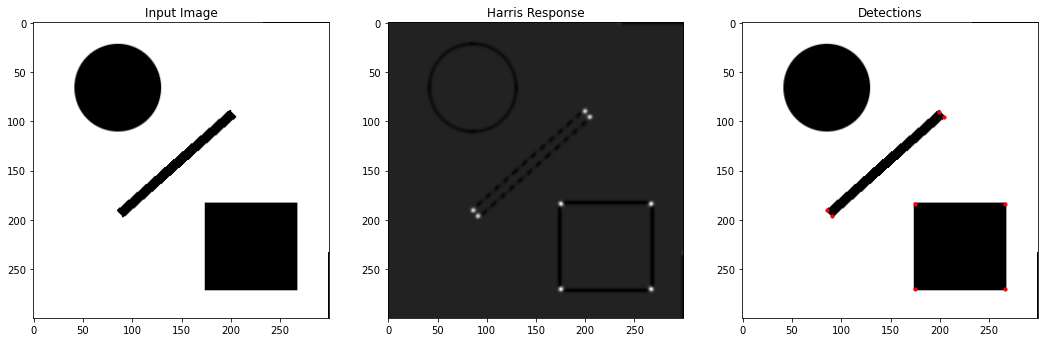

In [108]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)